## Ejercicios de pair programming 25 enero: Metricas Regresion Lineal

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


### Info columnas
|Columna| Tipo de dato | Descripcion |
|-------|--------------|-------------|
|Region| String|	Name of the region.
|WRI	| Decimal |	World Risk Score of the region.
|Exposure	| Decimal |	Risk/exposure to natural hazards such as earthquakes, hurricanes, floods, droughts, and sea ​​level rise.
|Vulnerability	| Decimal |	Vulnerability depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Susceptibility	| Decimal |	Susceptibility depending on infrastructure, nutrition, housing situation, and economic framework conditions.
|Lack of Coping Capabilities	| Decimal |	Coping capacities in dependence of governance, preparedness and early warning, medical care, and social and material security.
|Lack of Adaptive Capacities| Decimal |	Adaptive capacities related to coming natural events, climate change, and other challenges.
|Year	| Decimal |	Year data is being described.
|WRI Category| String|	WRI Category for the given WRI Score.
|Exposure Category| String|	Exposure Category for the given Exposure Score.
|Vulnerability Categoy| String|	Vulnerability Category for the given Vulnerability Score.
|Susceptibility Category| String|	Susceptibility Category for the given Susceptibility Score.

Link a la base de datos : https://www.kaggle.com/datasets/tr1gg3rtrash/global-disaster-risk-index-time-series-dataset

### Nuestra variable respuesta es Exposure_Sklearn, queremos saber cual es el riesgo de desastres naturales dependiendo del resto de variables



---

### df limpio

---

In [2]:
df = pd.read_csv("../datos/encoding.csv", index_col = 0)
df.head(2)

,region,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_Sklearn,wri_categorymap,susceptibility_categorymap,vulnerability_categorymap
0,papua new guinea,Very High,Very High,Very High,2.906480,23.26,1.296928,1.179006,0.962932,1.537045,2011.0,0.895683,5,5,5
1,madagascar,Very High,Very High,Very High,2.594391,20.68,1.545395,2.260942,1.017385,0.974085,2011.0,0.792566,5,5,5


In [3]:
#Definimos x, eliminamos las variables categóricas y la variable respuesta y la y con la variable respuesta
X = df.drop(['region', 'wri_category','vulnerability_category', 'susceptibility_category', 'exposure', 'exposure_Sklearn' ], axis = 1)
y = df["exposure_Sklearn"]

In [4]:
X.head()

,wri,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,wri_categorymap,susceptibility_categorymap,vulnerability_categorymap
0,2.906480,1.296928,1.179006,0.962932,1.537045,2011.0,5,5,5
1,2.594391,1.545395,2.260942,1.017385,0.974085,2011.0,5,5,5
2,2.468295,1.991215,1.863344,1.567891,2.201180,2011.0,5,5,5
3,2.458838,1.967788,2.376753,1.275704,1.847071,2011.0,5,5,5
4,2.417856,1.028584,0.884833,0.907151,1.122232,2011.0,5,4,4


In [5]:
y.head(3)

0    0.895683
1    0.792566
2    0.703437
Name: exposure_Sklearn, dtype: float64

In [6]:
# Seguimos el mismo proceso que en el ejercicio anterior
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
lr = LinearRegression(n_jobs=-1)
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [8]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [9]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
590,0.374900,0.376153,Train
1549,0.096723,0.138877,Train
420,0.409672,0.408887,Train
425,0.347722,0.369896,Train
857,0.491607,0.498475,Train


In [10]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
590,0.374900,0.376153,Train,-0.001253
1549,0.096723,0.138877,Train,-0.042154
420,0.409672,0.408887,Train,0.000786
425,0.347722,0.369896,Train,-0.022174
857,0.491607,0.498475,Train,-0.006869


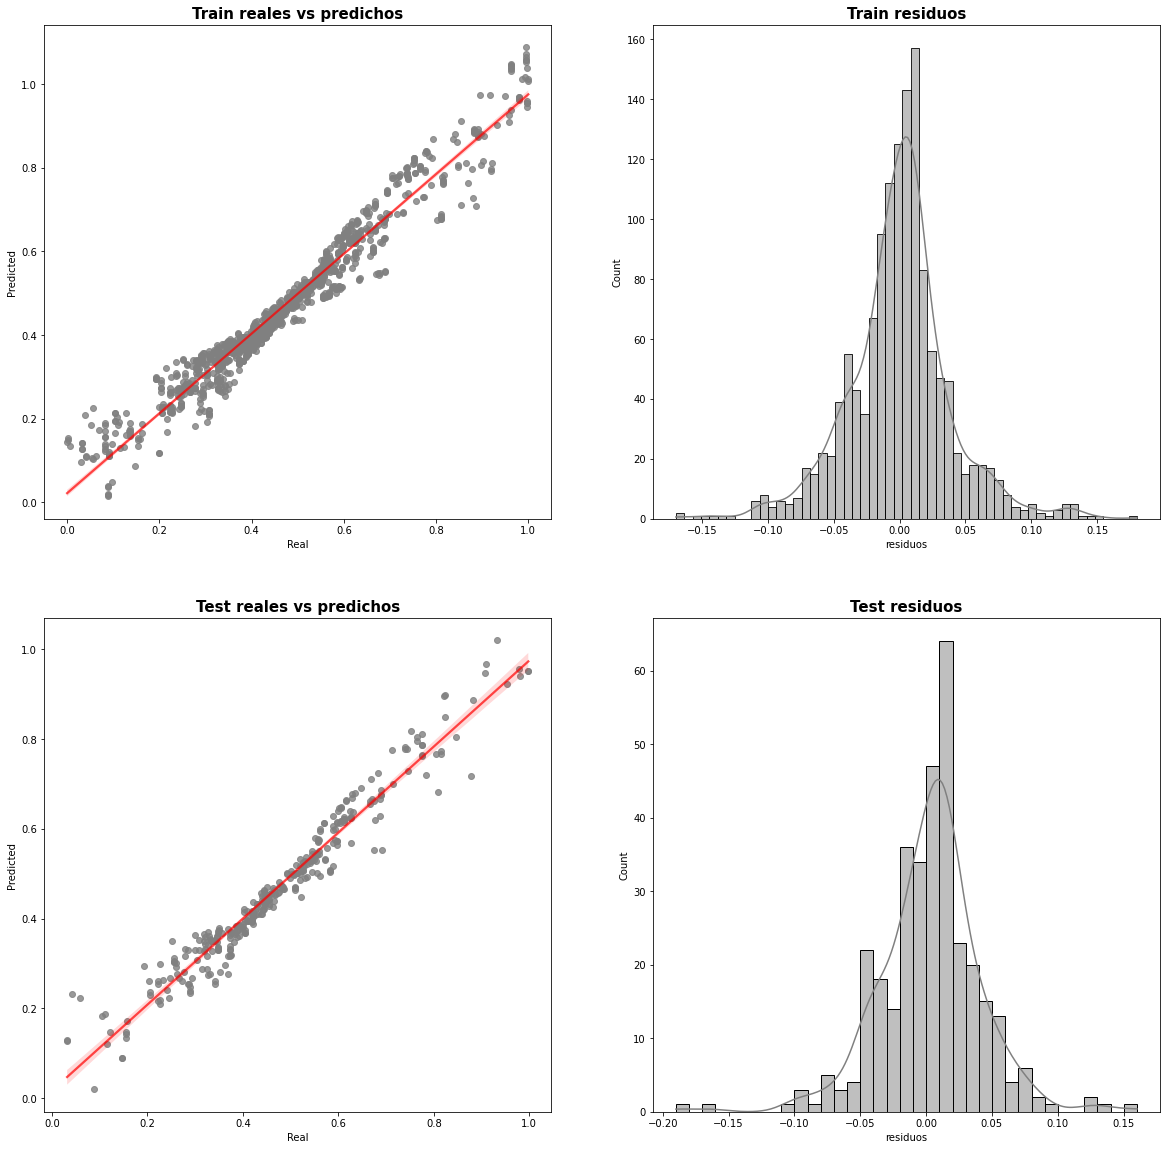

In [11]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [12]:
# Vemos las métricas del train
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Vemos las métricas del test
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.9538504815482431
El MAE es 0.027721154247386515
El MSE es 0.0015392669932070325
EL RMSE es  0.03923349325776425
Para el conjunto test:---------------
El valor de r2 score es  0.9523209564899697
El MAE es 0.02824136358289966
El MSE es 0.0015222426476270729
EL RMSE es  0.03901592812720303


In [13]:
#Metemos los resultados en un df para poder leerlo mejor
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,0.028241,0.001522,0.039016,0.952321,test,Linear Regresion
1,0.027721,0.001539,0.039233,0.953850,train,LinearRegression


Con R2 podemos ver que nuestro modelo explica el 95% de nuestra variable respuesta. Con lo cual podemos decir que es un buen modelo.

Tanto MAE, MSE, como RMSE son muy cercanos a 0 con lo cual nuestro modelo es bueno.

En cuanto al RMSE como hemos normalizado la variable respuesta con Sklearn MinMaxScaler con lo cual los resultados estan entre 0 y 1 entonces podemos decir que nuestras predicciones varian en un 3,9% que consideramos que es muy buen dato.

Nos podria parecer que nuestro modelo, al hacer tan buenas predicciones, pueda estar overfitting, pero  los valores del train son ligeramente peores que los del test con lo cual es valido.

---

### Outliers

---

In [14]:
outliers = pd.read_csv("../datos/outliers_encoding.csv", index_col = 0)
outliers.head(2)

,region,wri_category,vulnerability_category,susceptibility_category,wri,exposure,vulnerability,susceptibility,lack_of_coping_capabilities,lack_of_adaptive_capacities,year,exposure_Sklearn,vulnerability_categorymap,susceptibility_categorymap,wri_categorymap
0,vanuatu,Very High,High,High,1.640675,56.33,0.801253,0.792708,0.541556,0.926242,2011.0,0.563758,4,4,5
1,tonga,Very High,Medium,Medium,1.292570,56.04,0.376459,0.030528,0.707655,0.185736,2011.0,0.560853,3,3,5


In [15]:
# Hacemos el mismo proceso para nuestro df de outliers
X1 = outliers.drop(['region', 'wri_category','vulnerability_category', 'susceptibility_category', 'exposure', 'exposure_Sklearn' ], axis = 1)
y1 = outliers["exposure_Sklearn"]

In [16]:
x_train_out, x_test_out, y_train_out, y_test_out = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [17]:
lr_out = LinearRegression(n_jobs=-1)
lr_out.fit(x_train_out, y_train_out)

LinearRegression(n_jobs=-1)

In [18]:
y_predict_train_out = lr_out.predict(x_train_out) 
y_predict_test_out = lr_out.predict(x_test_out)

In [19]:
train_out = pd.DataFrame({'Real': y_train_out, 'Predicted': y_predict_train_out, 'Set': ['Train']*len(y_train_out)})
test_out  = pd.DataFrame({'Real': y_test_out,  'Predicted': y_predict_test_out,  'Set': ['Test']*len(y_test_out)})
resultados_out = pd.concat([train_out,test_out], axis = 0)
resultados_out.head()

,Real,Predicted,Set
127,0.259441,0.258551,Train
108,0.305720,0.318650,Train
69,0.826405,0.870856,Train
84,0.282681,0.290177,Train
97,0.317039,0.313402,Train


In [20]:
resultados_out['residuos'] = resultados_out['Real'] - resultados_out['Predicted']
resultados_out.head()

,Real,Predicted,Set,residuos
127,0.259441,0.258551,Train,0.000890
108,0.305720,0.318650,Train,-0.012930
69,0.826405,0.870856,Train,-0.044451
84,0.282681,0.290177,Train,-0.007496
97,0.317039,0.313402,Train,0.003637


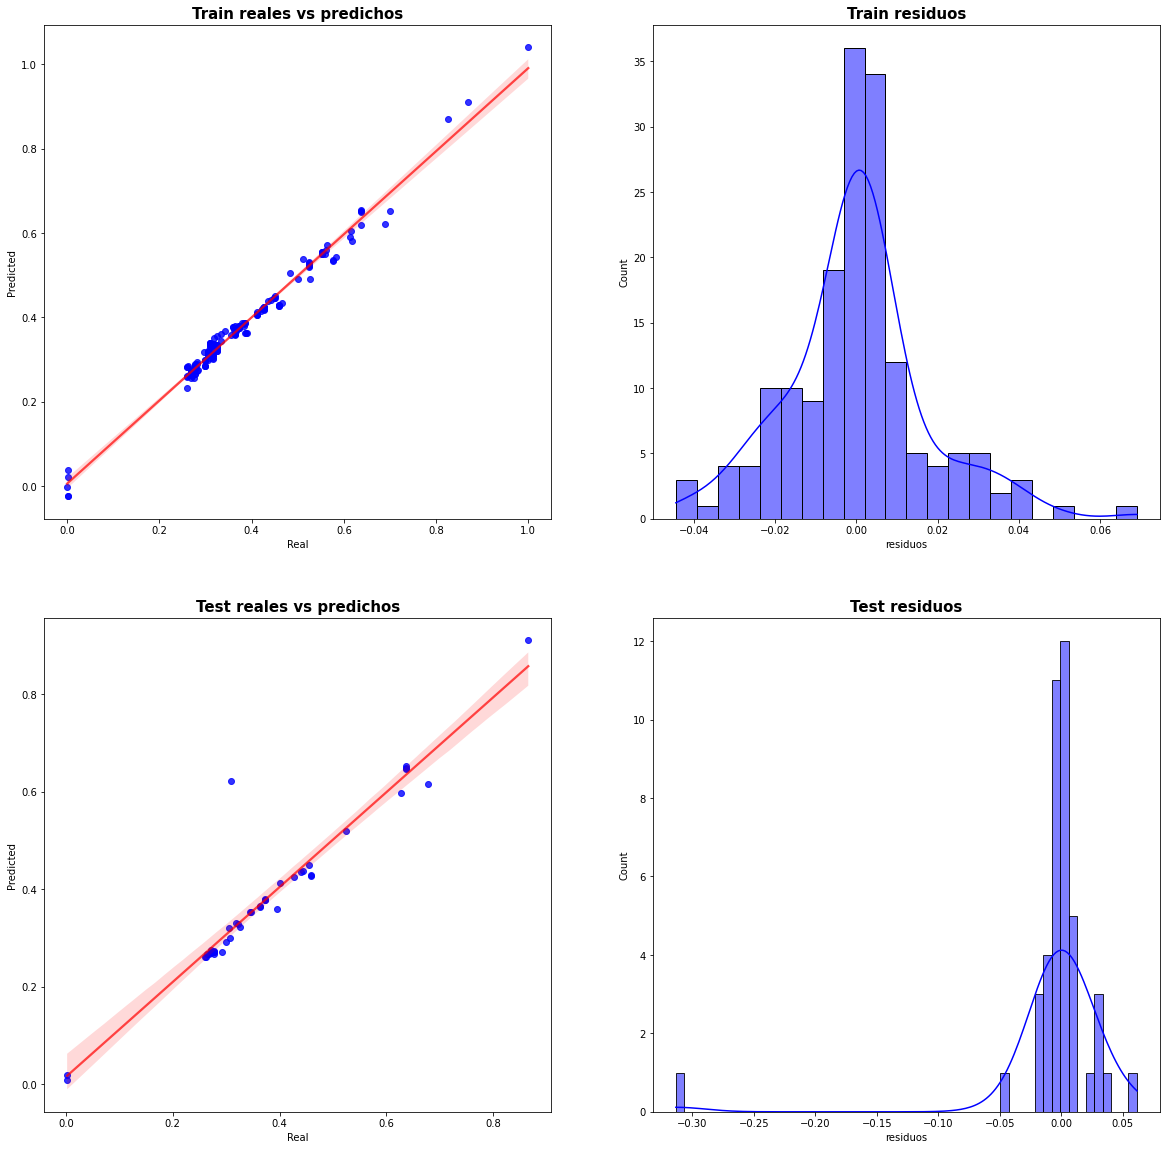

In [21]:
fig, ax = plt.subplots(2,2,figsize=(20,20))

sns.regplot(data = resultados_out[resultados_out['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados_out[resultados_out['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "blue",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


sns.histplot(resultados_out[resultados_out['Set'] == "Train"],
             x="residuos",
             color ="blue",
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados_out[resultados_out['Set'] == "Test"],
             x="residuos",
             color = "blue",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

In [22]:
resultados_metricas_out = {'MAE': [mean_absolute_error(y_test_out, y_predict_test_out), mean_absolute_error(y_train_out, y_predict_train_out)],
                'MSE': [mean_squared_error(y_test_out, y_predict_test_out), mean_squared_error(y_train_out, y_predict_train_out)],
                'RMSE': [np.sqrt(mean_squared_error(y_test_out, y_predict_test_out)), np.sqrt(mean_squared_error(y_train_out, y_predict_train_out))],
                'R2':  [r2_score(y_test_out, y_predict_test_out), r2_score(y_train_out, y_predict_train_out)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados_out = pd.DataFrame(resultados_metricas_out)

df_resultados_out

,MAE,MSE,RMSE,R2,set,modelo
0,0.018321,0.002579,0.050785,0.898529,test,Linear Regresion
1,0.012222,0.000303,0.017398,0.985017,train,LinearRegression


In [23]:
outliers.shape

(211, 15)

Según los resultados vemos que nuestro modelo está overfitting, lo cual tiene sentido ya que tenemos muy pocos datos en nuestro dataset de outliers. Con lo cual no podemos decir que sea un buen modelo para nuestro df de outliers.